### 1) Importing the libraries and dataset:

In [289]:
#impoting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt

%matplotlib inline

In [2]:
#importing the MTA dataset
#from march 17 2018 - june 22 2018

dfs = []
path = 'C:\\Users\\x-x-f\\Documents\\ds projects\\MTA notebook project'

for file in os.listdir(path):
    if file.split('.')[-1] =='txt':
        dfs.append(pd.read_csv(os.path.join(path, file)))
df = pd.concat(dfs)
        


In [133]:
#seeing how the dataframe looks like:
#After importing the dataset i found out that the period was from 3/10/2018 to 6/14/2018 and not
#from march 17 2018 - june 22 2018
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/10/2018,03:00:00,REGULAR,6543902,2216231,2018-03-10 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/10/2018,07:00:00,REGULAR,6543916,2216241,2018-03-10 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/10/2018,11:00:00,REGULAR,6543983,2216334,2018-03-10 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/10/2018,15:00:00,REGULAR,6544182,2216387,2018-03-10 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/10/2018,19:00:00,REGULAR,6544513,2216441,2018-03-10 19:00:00


In [4]:
#Number of rows = 2,756,607 thats a lot!
len(df.index)

2756607

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2756607 entries, 0 to 196977
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [6]:
df.shape

(2756607, 11)

### 2) Cleaning the dataset:

#### 2.1) Removing space in columns

In [134]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME'],
      dtype='object')

In [135]:
df.columns = [column.strip() for column in df.columns]
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME'],
      dtype='object')

#### 2.2) Converting DATE,TIME from type object to type datetime, and combining them in a new column:

In [9]:
df['DATE_TIME'] = pd.to_datetime(df.DATE + " " + df.TIME)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2756607 entries, 0 to 196977
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  DATE_TIME  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 273.4+ MB


#### 2.3) Check for NaN values:

In [136]:
#there are no NA, NaN values in the dataset
df.isna().sum()

C/A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
DATE_TIME    0
dtype: int64

#### 2.4) Remove duplicates:

In [12]:
#sanity check to check if unique
# there are 5 duplicate values
(df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE_TIME']).ENTRIES.count().
reset_index().sort_values('ENTRIES', ascending = False)).head(7) 

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1810665,R135,R031,01-00-00,34 ST-PENN STA,2018-03-22 08:00:00,2
1720509,R101,R001,02-00-05,SOUTH FERRY,2018-05-23 09:00:00,2
1718733,R101,R001,02-00-02,SOUTH FERRY,2018-05-23 09:00:00,2
1717550,R101,R001,02-00-00,SOUTH FERRY,2018-05-23 09:00:00,2
936991,N183,R415,00-00-00,BROAD CHANNEL,2018-04-04 05:00:00,2
1837731,R143,R032,02-03-00,TIMES SQ-42 ST,2018-03-16 04:00:00,1
1837732,R143,R032,02-03-00,TIMES SQ-42 ST,2018-03-16 08:00:00,1


In [13]:
df.shape

(2756607, 12)

In [14]:
#removing the duplicates
df.drop_duplicates(subset = ['C/A', 'UNIT', 'SCP', 'STATION', 'DATE_TIME'], inplace = True)

In [15]:
#we removed 5 duplicate rows
df.shape

(2756602, 12)

In [16]:
#we can see here that they are gone
(df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE_TIME']).ENTRIES.count().
reset_index().sort_values('ENTRIES', ascending = False)).head() 

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-03-10 03:00:00,1
1837737,R143,R032,02-03-00,TIMES SQ-42 ST,2018-03-17 04:00:00,1
1837729,R143,R032,02-03-00,TIMES SQ-42 ST,2018-03-15 20:00:00,1
1837730,R143,R032,02-03-00,TIMES SQ-42 ST,2018-03-16 00:00:00,1
1837731,R143,R032,02-03-00,TIMES SQ-42 ST,2018-03-16 04:00:00,1


#### 2.5) Removing rows where the DESC clolumn equals RECOVER AUD:

In [17]:
#we want to remove 7781 RECOVER AUD rows, we only want the regular rows.
df.DESC.value_counts()

REGULAR       2748826
RECOVR AUD       7776
Name: DESC, dtype: int64

In [89]:
#here we drop them
df.drop(df.loc[df['DESC'] == 'RECOVR AUD'].index, inplace = True)

In [90]:
#drop confirmed
df.DESC.value_counts()

REGULAR    2650680
Name: DESC, dtype: int64

In [109]:
len(df.index)

2650680

In [112]:
#Removed 105927 rows where DESC = 'RECOVER AUD'
2756607 - 2650680

105927

#### 2.5) Getting the daily entries for each turnstile

In [137]:
#daily cummulative entries of a turnstile by date
df_daily = df.groupby(['C/A', 'UNIT', 'SCP' , 'STATION', 'DATE'], as_index = False).ENTRIES.first()
df_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,03/10/2018,6543902
1,A002,R051,02-00-00,59 ST,03/11/2018,6544729
2,A002,R051,02-00-00,59 ST,03/12/2018,6545250
3,A002,R051,02-00-00,59 ST,03/13/2018,6546681
4,A002,R051,02-00-00,59 ST,03/14/2018,6548069
...,...,...,...,...,...,...
458325,TRAM2,R469,00-03-01,RIT-ROOSEVELT,06/11/2018,2926189
458326,TRAM2,R469,00-03-01,RIT-ROOSEVELT,06/12/2018,2927908
458327,TRAM2,R469,00-03-01,RIT-ROOSEVELT,06/13/2018,2929512
458328,TRAM2,R469,00-03-01,RIT-ROOSEVELT,06/14/2018,2931064


In [147]:
#DAILY_ENTRIES for each turnstile each day
df_daily['DAILY_ENTRIES'] = (df_daily.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])[['ENTRIES']].diff())

df_daily.dropna(subset = ['DAILY_ENTRIES'], axis = 0, inplace = True)
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
6,A002,R051,02-00-00,59 ST,03/16/2018,6551059,1482.0
7,A002,R051,02-00-00,59 ST,03/17/2018,6552626,1567.0
9,A002,R051,02-00-00,59 ST,03/19/2018,6552628,2.0
10,A002,R051,02-00-00,59 ST,03/20/2018,6554065,1437.0
11,A002,R051,02-00-00,59 ST,03/21/2018,6555430,1365.0


In [148]:
#dropping rows where DAILY_ENTRIES = 0
df_daily = df_daily[df_daily.DAILY_ENTRIES != 0]

In [149]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES
6,A002,R051,02-00-00,59 ST,03/16/2018,6551059,1482.0
7,A002,R051,02-00-00,59 ST,03/17/2018,6552626,1567.0
9,A002,R051,02-00-00,59 ST,03/19/2018,6552628,2.0
10,A002,R051,02-00-00,59 ST,03/20/2018,6554065,1437.0
11,A002,R051,02-00-00,59 ST,03/21/2018,6555430,1365.0


In [150]:
# np.where(condition, true, (false)np.where(cond, true, false) )


df_daily["FIXED_DAILY_ENTRIES"]=(
     np.where(
         
    ((df_daily.ENTRIES ==0) & (df_daily.DAILY_ENTRIES < 0)) ,0 # IN CASE OF COUNTER RESET RETURN 0 
    , 
      np.where((df_daily.ENTRIES !=0) & (df_daily.DAILY_ENTRIES < 0)
    ,
      abs(df_daily.DAILY_ENTRIES) # IN CASE OF COUNTER REVERSE RETURN ABS(DAILY_ENTRIES)
    , 
      df_daily.DAILY_ENTRIES) # IN CASE NORMAL COUNTER RETURN SAME VALUE AS DAILY_ENTRIES
))

#### 2.6) showing what changed after cleaning  the dataset




In [156]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES,FIXED_DAILY_ENTRIES
6,A002,R051,02-00-00,59 ST,03/16/2018,6551059,1482.0,1482.0
7,A002,R051,02-00-00,59 ST,03/17/2018,6552626,1567.0,1567.0
9,A002,R051,02-00-00,59 ST,03/19/2018,6552628,2.0,2.0
10,A002,R051,02-00-00,59 ST,03/20/2018,6554065,1437.0,1437.0
11,A002,R051,02-00-00,59 ST,03/21/2018,6555430,1365.0,1365.0


In [157]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385899 entries, 6 to 458329
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   C/A                  385899 non-null  object 
 1   UNIT                 385899 non-null  object 
 2   SCP                  385899 non-null  object 
 3   STATION              385899 non-null  object 
 4   DATE                 385899 non-null  object 
 5   ENTRIES              385899 non-null  int64  
 6   DAILY_ENTRIES        385899 non-null  float64
 7   FIXED_DAILY_ENTRIES  385899 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 26.5+ MB


In [158]:
df_daily.shape

(385899, 8)

In [160]:
#we went from 2756607 rows to 385899 rows
len(df_daily.index)

385899

### 3) Exploratory data analysis: when was the lowest entries?
 
-check out p6 pair2

In [178]:
#try to find the station with the lowest entries mean(), median()
#then mask it and find the day with the least entries
#then plot it (how?)
#when are the popular stations least crowded

In [163]:
#number of different stations
df['STATION'].nunique()

376

In [164]:
#each station, how many times did it repeat
df_daily['STATION'].value_counts(ascending=False)

34 ST-PENN STA     8601
FULTON ST          7319
23 ST              5769
GRD CNTRL-42 ST    5156
CANAL ST           4987
34 ST-HERALD SQ    4815
CHAMBERS ST        4571
59 ST              4547
86 ST              4528
TIMES SQ-42 ST     4482
42 ST-PORT AUTH    4340
ATL AV-BARCLAY     4070
PATH NEW WTC       3985
14 ST              3955
125 ST             3701
WALL ST            3615
59 ST COLUMBUS     3420
14 ST-UNION SQ     3381
96 ST              3177
50 ST              3170
CORTLANDT ST       3160
28 ST              3138
47-50 STS ROCK     2876
JAY ST-METROTEC    2855
LEXINGTON AV/53    2794
CHURCH AV          2734
BOWLING GREEN      2411
161/YANKEE STAD    2384
FLUSHING-MAIN      2381
BOROUGH HALL       2371
ST. GEORGE         2241
JAMAICA 179 ST     2132
CITY / BUS         2058
FOREST HILLS 71    2007
LACKAWANNA         1999
QUEENS PLAZA       1935
7 AV               1931
COURT SQ           1921
116 ST             1921
JOURNAL SQUARE     1914
51 ST              1908
JKSN HT-ROOSVLT 

In [ ]:
df_daily[df_daily.DAILY_ENTRIES < 1 ]

In [165]:
#finding stations with the lowest/highest daily entries median 1
df_mean = (df_daily.groupby('STATION')[['DAILY_ENTRIES']].median())

df_mean.sort_values(by='DAILY_ENTRIES', ascending=True)

,DAILY_ENTRIES
STATION,
ORCHARD BEACH,7.0
BEACH 105 ST,45.0
BROAD CHANNEL,75.0
75 AV,77.0
AVENUE I,80.5
E 143/ST MARY'S,90.5
14TH STREET,96.0
NEWARK HM HE,104.5
NEWKIRK AV,108.5


In [58]:
pd.set_option('display.max_rows', 1000)

In [280]:
#finding stations with the lowest/highest daily entries median 2
#viewing their data to check if there is anything suspicious 
df_daily[(df_daily['STATION'] == 'YORK ST')]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,DAILY_ENTRIES,FIXED_DAILY_ENTRIES
230059,N530,R301,00-00-00,YORK ST,03/16/2018,13638676,3327.0,3327.0
230060,N530,R301,00-00-00,YORK ST,03/17/2018,13642927,4251.0,4251.0
230061,N530,R301,00-00-00,YORK ST,03/18/2018,13645356,2429.0,2429.0
230062,N530,R301,00-00-00,YORK ST,03/19/2018,13647346,1990.0,1990.0
230063,N530,R301,00-00-00,YORK ST,03/20/2018,13651504,4158.0,4158.0
230064,N530,R301,00-00-00,YORK ST,03/21/2018,13655604,4100.0,4100.0
230065,N530,R301,00-00-00,YORK ST,03/22/2018,13657730,2126.0,2126.0
230066,N530,R301,00-00-00,YORK ST,03/23/2018,13661900,4170.0,4170.0
230067,N530,R301,00-00-00,YORK ST,03/24/2018,13666058,4158.0,4158.0
230068,N530,R301,00-00-00,YORK ST,03/25/2018,13668490,2432.0,2432.0


#### Seeing the top 10 daily entries of stations by least meadian:

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

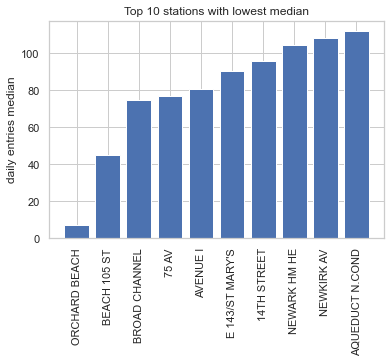

In [288]:
#the top 3 least entries were at ORCHARD BEACH, BEACH 105 ST, BROAD CHANNEL
station_medians = df_daily.groupby("STATION").DAILY_ENTRIES.median().sort_values()[0:10].reset_index()

plt.bar(x = station_medians['STATION'], height = station_medians['DAILY_ENTRIES'])

plt.ylabel('daily entries median')

plt.title('Top 10 stations with lowest median')
plt.xticks(rotation= 90)

#### Seeing the top 10 daily entries of stations by highest meadian:

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

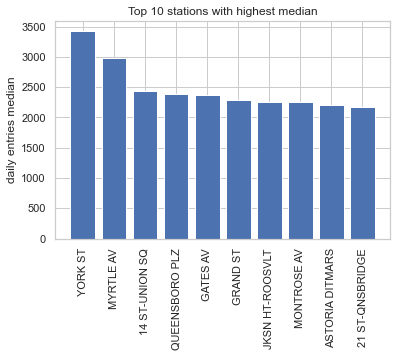

In [287]:
#the top 3 highest entries were at YORK ST, MYRTLE AV, 14 ST-UNION SQ
station_medians2 = df_daily.groupby('STATION').DAILY_ENTRIES.median().sort_values(ascending = False)[0:10].reset_index()

plt.bar(x = station_medians2['STATION'], height = station_medians2['DAILY_ENTRIES'])

plt.ylabel('daily entries median')

plt.title('Top 10 stations with highest median')

plt.xticks(rotation = 90)

#### Ploting some of the stations that we found from the above bar plots,  to see what are the best days of these stations where the daily entries is the lowest



In [265]:
mask_ORCHARD = df_daily[(df_daily['STATION'] =='ORCHARD BEACH')]
#mask_ORCHARD = mask_ORCHARD['DATE'].sort_values().reset_index()

mask_ORCHARD.sort_values(by = 'DATE').inplace = True

### 1) ORCHARD BEACH

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

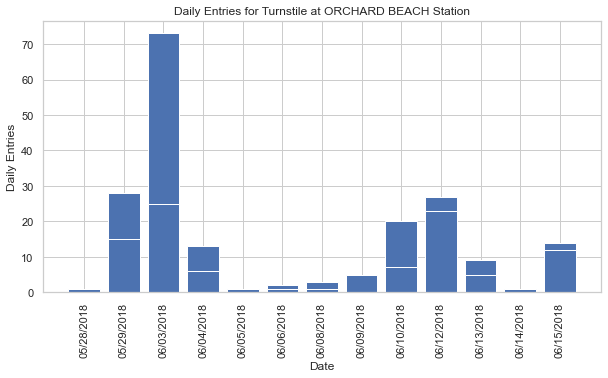

In [238]:
#At the ORCHARD BEACH STATION the best days are from 5/28/2018 to 6/15/2018 to film a movie, entries were around 20 or

plt.figure(figsize = (10,5))

plt.bar(x = mask_ORCHARD['DATE'], height = mask_ORCHARD['DAILY_ENTRIES'])

plt.title('Daily Entries for Turnstile at ORCHARD BEACH Station')

plt.xlabel('Date')
plt.ylabel('Daily Entries')

plt.xticks(rotation = 90)

### 2) BEACH 105 ST

In [261]:
mask =  df_daily[(df_daily['STATION'] =='BEACH 105 ST')]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90],
 <a list of 91 Text major ticklabel objects>)

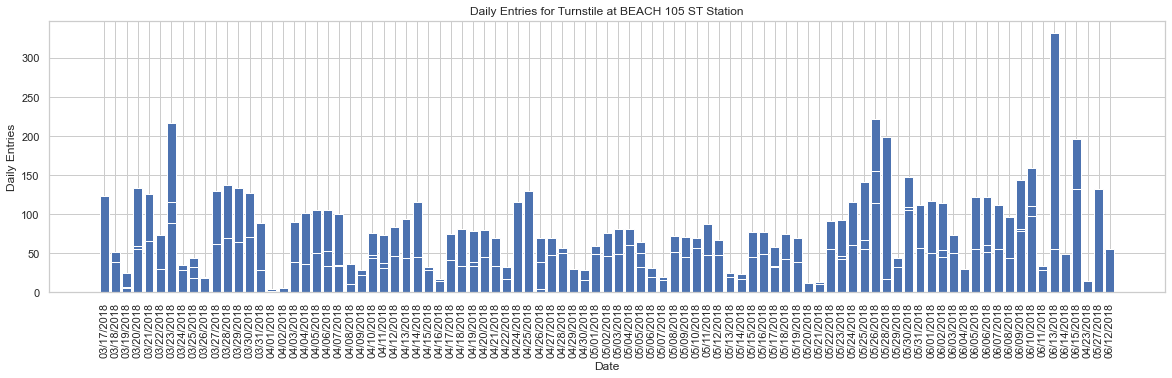

In [264]:
#At the BEACH 105 ST STATION the best days are from 3/31/2018 to 5/23/2018 to film a movie, entries were around 100 or
# less each day in this period
plt.figure(figsize = (20,5))

plt.bar(x = mask['DATE'], height = mask['DAILY_ENTRIES'])

plt.title('Daily Entries for Turnstile at BEACH 105 ST Station')

plt.xlabel('Date')
plt.ylabel('Daily Entries')

plt.xticks(rotation = 90)

### 3) BROAD CHANNEL

In [279]:
mask3 =  df_daily[(df_daily['C/A'] == 'N183') &
       (df_daily['UNIT'] == 'R415') &
       (df_daily['SCP'] == "00-00-00") &
       (df_daily['STATION'] =='BROAD CHANNEL') &
       (pd.to_datetime(df_daily['DATE']).dt.month == 4)]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 <a list of 29 Text major ticklabel objects>)

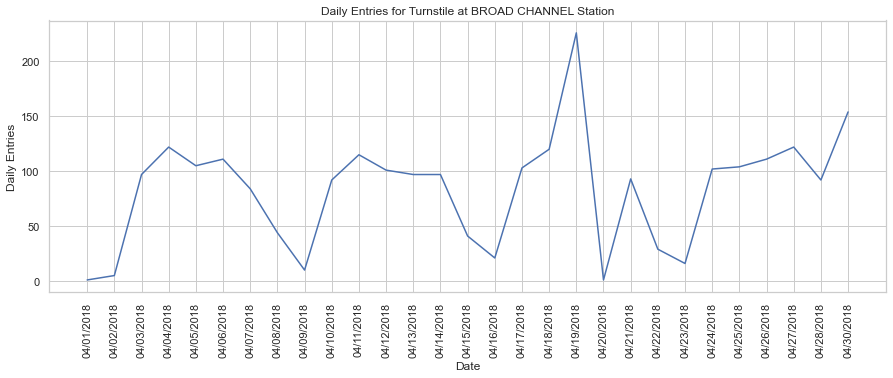

In [284]:
#At the BROAD CHANNEL STATION most days in April were good to film a movie, entries were around 100

plt.figure(figsize = (15,5))
plt.plot(mask3['DATE'], mask3['DAILY_ENTRIES'])

plt.title('Daily Entries for Turnstile at BROAD CHANNEL Station')

plt.xlabel('Date')
plt.ylabel('Daily Entries')


plt.xticks(rotation = 90)

### 4) YORK ST

In [281]:
mask_york =  df_daily[(df_daily['STATION'] =='YORK ST')]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82],
 <a list of 83 Text major ticklabel objects>)

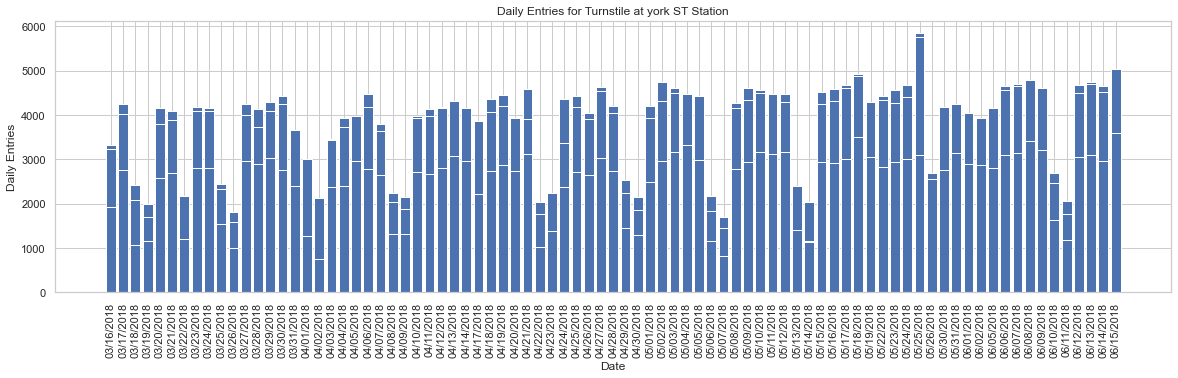

In [282]:
#At the YORK ST STATION the best days are sunday and monday, entries were around 2000
plt.figure(figsize = (20,5))

plt.bar(x = mask_york['DATE'], height = mask_york['DAILY_ENTRIES'])

plt.title('Daily Entries for Turnstile at york ST Station')

plt.xlabel('Date')
plt.ylabel('Daily Entries')

plt.xticks(rotation = 90)